Import `Resources/haunted_places.csv` into a database named `nw-project-3` and a collection named `haunted-places` and then run the code below

In [54]:
# Imports
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import squarify
import numpy as np

In [14]:
# Create instance of MongoClient
client = MongoClient(port=27017)

# List databases
print(client.list_database_names())

['UNONOESNINGUNO', 'admin', 'config', 'local', 'nw-project-3', 'uk_food']


In [15]:
# assign nw-project-3 database to db and list the collection names
db = client['nw-project-3']
print(db.list_collection_names())

['haunted-places']


In [16]:
# print out an entry from haunted-places
pprint(db['haunted-places'].find_one())

{'_id': ObjectId('65275829fa10580601927e54'),
 'city': 'Ada',
 'city_latitude': 42.960727,
 'city_longitude': -85.4954803,
 'country': 'United States',
 'description': 'Ada witch - Sometimes you can see a misty blue figure '
                'floating within a 3-mile radius of the Ada Cemetery on 2 Mile '
                'between Egypt Valley and Honey Creek. The story of her origin '
                'is as follows: A man suspected his wife of having an affair, '
                'so he followed her late one night when she thought he was '
                'asleep. Sure enough, she went to a field near their property '
                'where she met her lover. The husband was enraged and killed '
                'his wife, which resulted in a struggle with the other man. '
                'Both men died from their injuries. It is said that late at '
                'night (especially during the night of and the nights '
                'preceding a full moon) people driving by the field c

In [81]:
cursor = db['haunted-places'].find()
data_list = list(cursor)

# Create a DataFrame from the list of dictionaries
haunted_main = pd.DataFrame(data_list)

# Now, 'df' contains all the data from the 'haunted-places' collection as a DataFrame
haunted_main.head(5)

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,65275829fa10580601927e54,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,65275829fa10580601927e55,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,65275829fa10580601927e56,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,65275829fa10580601927e57,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,65275829fa10580601927e58,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


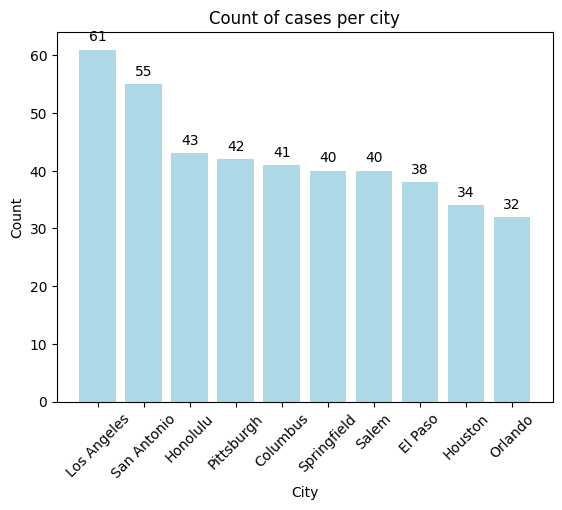

In [32]:
haunted_cities = haunted_main['city'].value_counts().head(10) #Only 10 the most 'haunted' cities
plt.bar(haunted_cities.index, haunted_cities.values, color = 'lightblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of cases per city')
plt.xticks(rotation=45)

for i, count in enumerate(types2.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

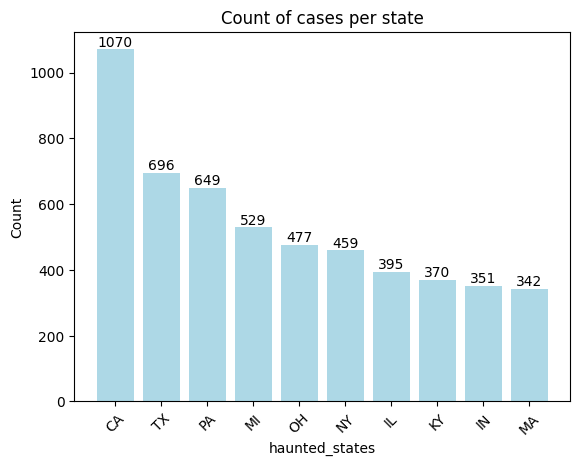

In [34]:
haunted_states = haunted_main['state_abbrev'].value_counts().head(10) #Only 10 the most 'haunted' cities
plt.bar(haunted_states.index, haunted_states.values, color = 'lightblue')
plt.xlabel('haunted_states')
plt.ylabel('Count')
plt.title('Count of cases per state')
plt.xticks(rotation=45)

for i, count in enumerate(haunted_states.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

In [78]:
#haunted_main = haunted_main.drop(7924)


In [82]:
haunted_main['place'] = haunted_main['location'].str.extract(r'([a-zA-Z]+)\s*$')

# Replace 'inn' with 'hotel' in the 'place' column
haunted_main['place'] = haunted_main['place'].str.replace('inn', 'hotel', case=False)
haunted_main.head ()

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,place
0,65275829fa10580601927e54,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,Cemetery
1,65275829fa10580601927e55,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,NaN
2,65275829fa10580601927e56,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,Trestle
3,65275829fa10580601927e57,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,University
4,65275829fa10580601927e58,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,College


In [80]:
haunted_main['place']=haunted_main['location'].str.split().str[-1]
haunted_main['place'] = haunted_main['place'].apply(lambda word: re.sub(r'[^a-zA-Z]', '', word) if pd.notnull(word) else '') #Removing non-letter characters from the last position using regular expression
haunted_main['place'] = haunted_main['place'].str.replace('inn', 'hotel')
haunted_main.head()

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,place


In [83]:
print(haunted_main['place'])

0           Cemetery
1                NaN
2            Trestle
3         University
4            College
            ...     
10987           hall
10988           Fire
10989    Institution
10990         School
10991         Forest
Name: place, Length: 10992, dtype: object


In [89]:
place_counts = haunted_main['place'].value_counts()
place_counts. head (30)

place
School        921
Cemetery      620
House         367
College       324
University    315
Road          302
hotel         247
Park          246
Hotel         210
Bridge        182
Hospital      165
Church        130
Center        130
Mansion       121
school        118
Theater        96
Restaurant     90
Hall           87
Theatre        87
Hill           83
Building       80
cemetery       77
Museum         76
Elementary     75
Street         66
Home           66
Lake           60
Library        58
Club           53
house          49
Name: count, dtype: int64

In [86]:
total_count = place_counts.sum()
place_percentages = (place_counts / total_count) * 100
place_percentages

place
School           8.778953
Cemetery         5.909827
House            3.498237
College          3.088361
University       3.002574
                   ...   
Middlesbrough    0.009532
Beachwood        0.009532
Sunoco           0.009532
Anderson         0.009532
Fire             0.009532
Name: count, Length: 1945, dtype: float64

In [115]:
merge_dict = {
    'school': 'Schools',
    'School': 'Schools',
    'High': 'Schools',
    'university': 'Schools',
    'University': 'Schools',
    'college': 'Schools',
    'College': 'Schools',
    'Elementary': 'Schools',  
    'elementary': 'Schools',
    'Academy': 'Schools',
    'Cementeries': 'Cementeries',
    'cemetery': 'Cementeries',  
    'Cemetery': 'Cementeries', 
    'Graveyard': 'Cementeries',
    'House': 'Houses',
    'Apartments': 'Houses',
    'home': 'Houses',
    'Mansion': 'Houses',
    'Home': 'Houses',
    'house':'Houses',
    'Road': 'Roads',
    'road': 'Roads',
    'Street':'Roads',
    'Rd': 'Roads',
    'hotel':'Hotels',
    'Hotel':'Hotels',
}
haunted_main['place_merge'] = haunted_main['place'].replace(merge_dict)


In [116]:
place_counts_2 = haunted_main['place_merge'].value_counts()
place_counts_2.head (50)

place_merge
Schools        1854
Cementeries     736
Houses          653
Hotels          457
Roads           451
Park            246
Bridge          182
Hospital        165
Center          130
Church          130
Theater          96
Restaurant       90
Hall             87
Theatre          87
Hill             83
Building         80
Museum           76
Lake             60
Library          58
Club             53
Auditorium       39
bridge           39
Plantation       35
s                35
County           35
Tavern           34
Creek            34
Mountain         32
Castle           31
Station          30
Tracks           29
River            29
Woods            29
Hollow           28
Mall             27
Mill             27
park             26
Lodge            26
Asylum           26
Island           23
Base             23
Manor            23
building         23
Place            22
Store            22
Breakfast        22
county           21
Beach            21
tracks           21
Prison  

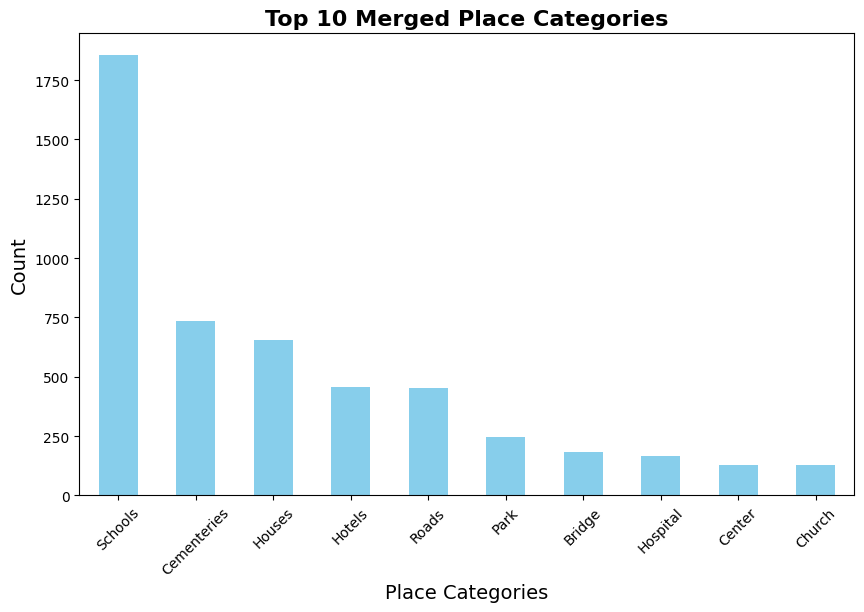

In [117]:
top_10_places = place_counts_2.head(10)
top_10_places.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Merged Place Categories', fontsize=16, weight='bold')
plt.xlabel('Place Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()